# Аналитика клиентов и логов gamedev-стартапа

### Провеяем, сколько пустых значений в датафрейме `user_data`.

In [6]:
import pandas as pd

In [7]:
user_data = pd.read_csv('5_user_data.csv')
logs = pd.read_csv('5_logs.csv')

In [8]:
user_data.age.describe().round(2)

count    2954.00
mean       44.20
std        14.25
min        20.00
25%        32.00
50%        44.00
75%        56.00
max        69.00
Name: age, dtype: float64

In [9]:
user_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2954 entries, 0 to 2953
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   client   2954 non-null   int64
 1   premium  2954 non-null   bool 
 2   age      2954 non-null   int64
dtypes: bool(1), int64(2)
memory usage: 49.2 KB


### Определяем, какой клиент или клиенты дали наибольшее количество успешных ответов.

In [10]:
success = logs[logs['success'] == True]
success

,client,success,platform,time
0,40177,True,phone,1585412212
1,61468,True,phone,1585425658
3,9961,True,phone,1585400189
4,10931,True,computer,1585468629
5,41928,True,phone,1585446772
...,...,...,...,...
4493,92584,True,computer,1585408896
4494,95152,True,computer,1585420263
4496,73299,True,phone,1585458370
4497,8967,True,phone,1585465121


In [11]:
count_success = success.client.value_counts()
count_success

client
61473    41
78349    41
36165    41
61468    41
92584    41
         ..
50300     1
51575     1
3553      1
502       1
11983     1
Name: count, Length: 2845, dtype: int64

In [12]:
count_success.max()

np.int64(41)

In [13]:
max_success = count_success.loc[count_success == 41]

In [14]:
max_success.index.sort_values()

Index([12179, 28719, 36165, 52870, 61468, 61473, 78349, 82563, 92584], dtype='int64', name='client')

### Выясняем, с какой платформы было дано наибольшее количество успешных ответов

In [15]:
success = logs[logs['success'] == True]

In [16]:
best_platform = success.platform.value_counts()
best_platform

platform
phone       2019
computer    1090
tablet       180
Name: count, dtype: int64

In [17]:
best_platform.idxmax()

'phone'

### Определяем, какая платформа пользуется наибольшей популярностью среди премиум-клиентов.

In [18]:
user_logs = pd.merge(user_data, logs, on='client', how='inner')
user_logs

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218
3437,29863,False,46,True,tablet,1585443437


In [19]:
user_logs.head()

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918


In [20]:
prem = user_logs.loc[user_logs['premium'] == True]
prem

,client,premium,age,success,platform,time
23,74867,True,27,False,computer,1585452086
24,49379,True,25,False,computer,1585433626
25,88203,True,35,True,phone,1585450059
30,32603,True,20,True,computer,1585473383
52,53182,True,24,True,phone,1585406474
...,...,...,...,...,...,...
3413,52373,True,36,True,phone,1585405142
3415,13688,True,66,True,computer,1585453923
3419,40643,True,22,True,phone,1585413473
3432,53774,True,50,True,phone,1585422804


In [21]:
prem.age.max()

np.int64(69)

In [22]:
prem.premium.value_counts()

premium
True    420
Name: count, dtype: int64

In [23]:
best_platform.idxmax()

'phone'

### Смотрим количество ответов премиум-клиентов на каждой платформе.

In [24]:
best_platform = prem.platform.value_counts()

In [25]:
import matplotlib.pyplot as plt

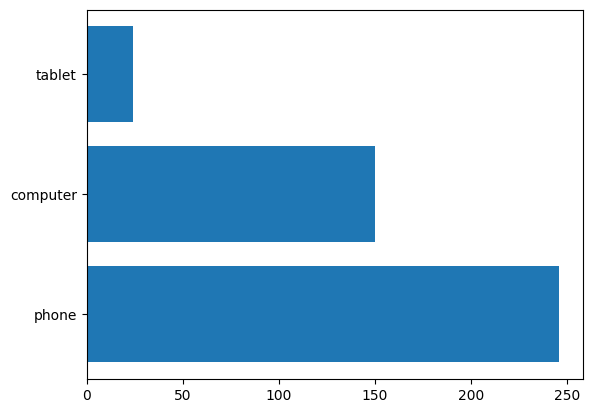

In [26]:
plt.barh(best_platform.index, best_platform.values)
plt.show()

### Проверяем у какой категории клиентов доля неуспешных ответов выше.

In [27]:
prem_success = user_logs.groupby(['premium', 'success'], as_index = False).agg({'client': 'count'})
prem_success

,premium,success,client
0,False,False,775
1,False,True,2244
2,True,False,117
3,True,True,303


In [28]:
counts_success = prem_success.pivot(index='premium', columns='success', values='client')
counts_success

success,False,True
premium,,
False,775,2244
True,117,303


In [29]:
counts_success['ratio'] = counts_success[True] / counts_success[False]
counts_success

success,False,True,ratio
premium,,,
False,775,2244,2.895484
True,117,303,2.589744


### Для сравнения распределения возраста у премиум и обычных клиентов строим диаграммы.

In [30]:
not_prem = user_logs.loc[user_logs['premium'] == False]
not_prem

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
1,4391,False,55,False,phone,1585409861
2,27372,False,64,False,phone,1585446018
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
...,...,...,...,...,...,...
3433,27470,False,40,False,computer,1585443046
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3437,29863,False,46,True,tablet,1585443437


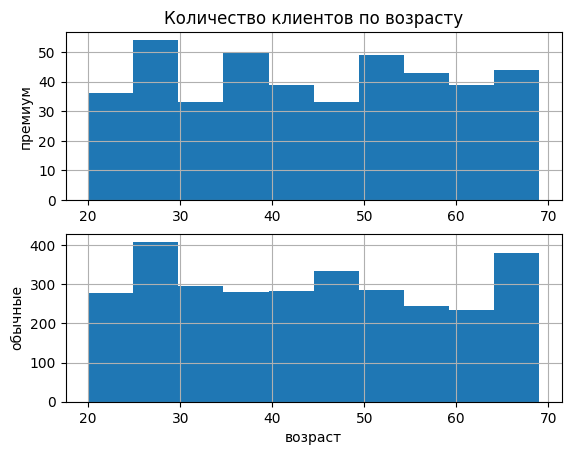

In [31]:
plt.subplot(2, 1, 1)
plt.hist(user_logs.query('premium == True').age)
plt.title("Количество клиентов по возрасту") 
plt.ylabel("премиум") 
plt.grid(True)           

plt.subplot(2, 1, 2)
plt.hist(user_logs.query('premium == False').age)
plt.xlabel("возраст")  
plt.ylabel("обычные") 
plt.grid(True)    

### Строим график, отражающий распределение количества успешных ответов на пользователя.

In [33]:
true_success = user_logs.query('success == True')
true_success 

,client,premium,age,success,platform,time
0,46346,False,58,True,phone,1585452839
3,11989,False,44,True,computer,1585403698
4,60664,False,49,True,phone,1585406918
5,78605,False,36,True,tablet,1585430330
8,77451,False,49,True,phone,1585444298
...,...,...,...,...,...,...
3432,53774,True,50,True,phone,1585422804
3434,19411,False,29,True,phone,1585400902
3435,61579,False,50,True,phone,1585436158
3436,61221,True,64,True,phone,1585440218


In [34]:
count_true = true_success.client.value_counts()
count_true

client
61473    41
92584    41
28719    41
78349    41
61468    41
         ..
32603     1
82505     1
37237     1
28007     1
35036     1
Name: count, Length: 2104, dtype: int64

In [35]:
count_true = count_true.rename('client')

In [36]:
import seaborn as sns

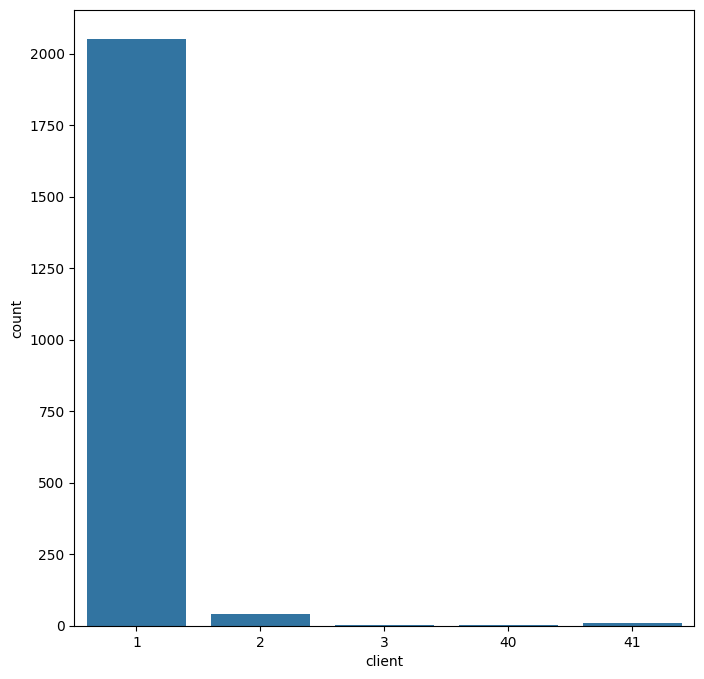

In [37]:
plt.figure(figsize=(8, 8))
sns.countplot(x = count_true)
plt.show()

### Смотрим, клиенты какого возраста дали наибольшее количество успешных ответов на компьютере.

In [38]:
true_success = user_logs.query('success == True')
true_computer = true_success.query('platform == "computer"')
true_computer

,client,premium,age,success,platform,time
3,11989,False,44,True,computer,1585403698
12,32406,False,24,True,computer,1585479382
14,62404,False,40,True,computer,1585430097
20,68848,False,35,True,computer,1585440553
26,49675,False,48,True,computer,1585402108
...,...,...,...,...,...,...
3414,93718,False,63,True,computer,1585466349
3415,13688,True,66,True,computer,1585453923
3417,68348,False,69,True,computer,1585456739
3427,9450,False,34,True,computer,1585446079


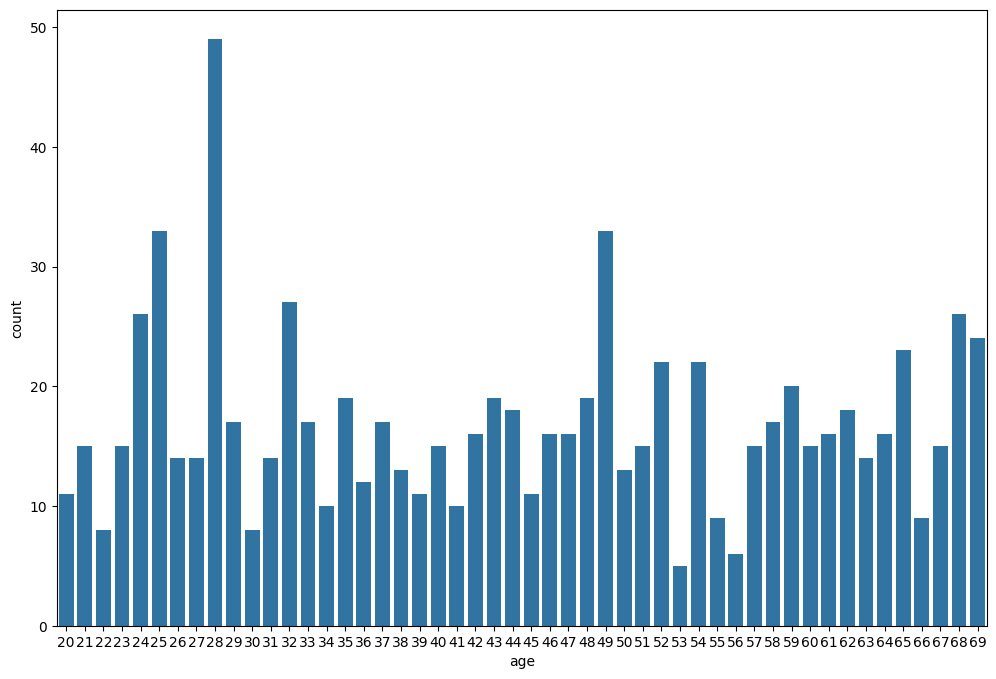

In [39]:
plt.figure(figsize=(12, 8))
sns.countplot(data = true_computer, x = 'age')
plt.show()